**Problem Statement**

Build a model which predicts sales based on the money spent on different platforms for marketing.

https://www.kaggle.com/ashydv/advertising-dataset/downloads/advertising.csv/1

In [108]:
!pip install statsmodels




In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from google.colab import files
uploaded = files.upload()

In [12]:
df2 = pd.read_csv('advertising.csv')
df2.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [20]:
df2.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


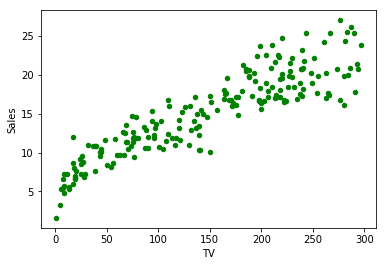

In [61]:
#Scatter ploting for TV
df2.plot(kind='scatter' , x='TV', y='Sales',color='green');

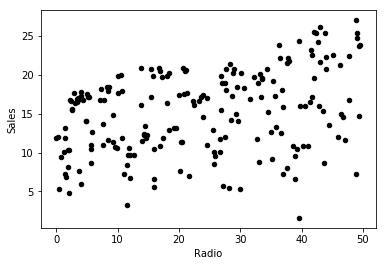

In [70]:
#Scatter ploting for Radio

df2.plot(kind = 'scatter' , x='Radio' , y='Sales' , color = 'black');

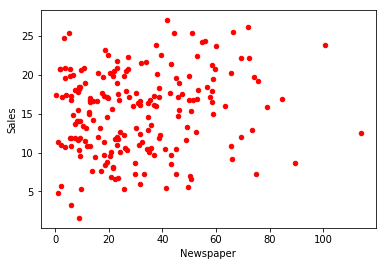

In [71]:
#Scatter ploting for Newspaper

df2.plot(kind = 'scatter' , x='Newspaper' , y='Sales' , color = 'red');

**Data Inspection**

In [52]:
#My data has 201(index 0 ) 200 value and 4 features
df2.shape

(200, 4)

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [56]:
#Check the Null value 
df2.isnull().values.any()

# Checking Null values
df2.isnull().sum()*100/df2.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

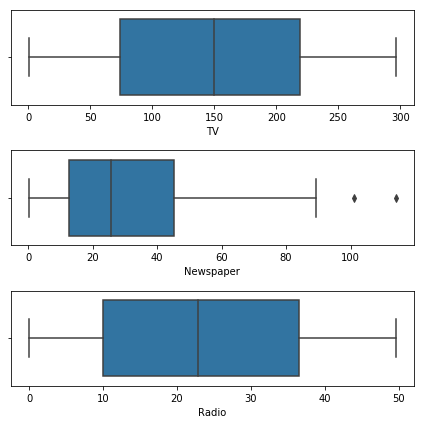

In [67]:
# Outlier Analysis
#The values in the box

fig, axs = plt.subplots(3, figsize = (6,6))
plt1 = sns.boxplot(df2['TV'], ax = axs[0])

plt2 = sns.boxplot(df2['Newspaper'], ax = axs[1])

plt3 = sns.boxplot(df2['Radio'], ax = axs[2])

plt.tight_layout()

**Exploratory Data Analysis**

Univariate Analysis


Sales (Target Variable)

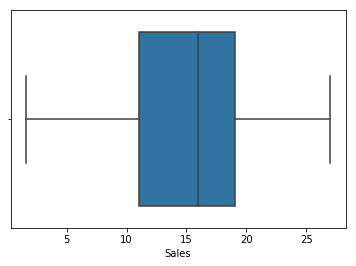

In [69]:
sns.boxplot(df2['Sales'])
plt.show()

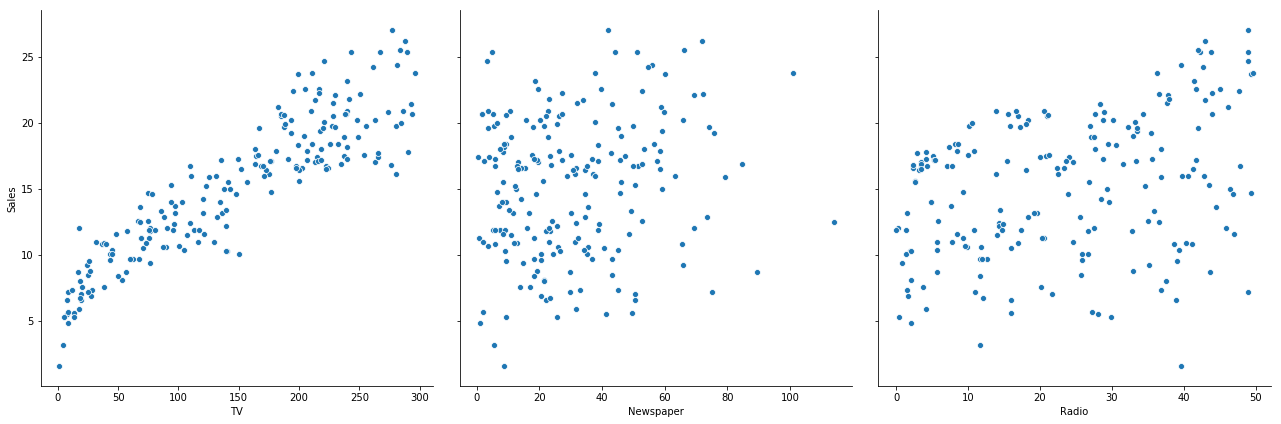

In [81]:
# Let's see how Sales are related with other variables using scatter plot

sns.pairplot(df2, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=6, aspect=1, kind='scatter')
plt.show()

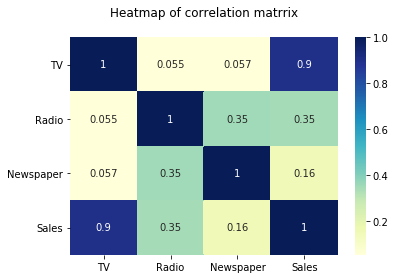

In [84]:
# Let's see the correlation between different variables.

sns.heatmap(df2.corr(), cmap="YlGnBu", annot = True)

plt.title('Heatmap of correlation matrrix\n')
plt.show()

As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. 
So let's go ahead and perform simple linear regression using TV as our feature variable.

Generic Steps in model building using statsmodels
We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [0]:
x = df2['TV']
y = df2['Sales']

Train-Test Split
You now need to split our variable into training and testing sets. You'll perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [0]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [92]:
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [94]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

Building a Linear Model
You first need to import the statsmodel.api library using which you'll perform the linear regression.

By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

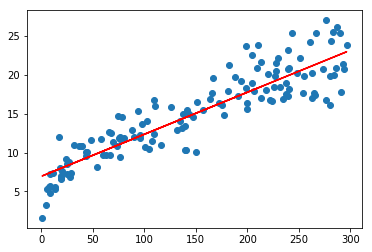

In [119]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

Model Evaluation

Residual analysis

To validate assumptions of the model, and hence the reliability for inference



Distribution of the error terms

We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.